In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as cc
from matplotlib.colors import ListedColormap

# creates the four colors for our simulation, EMPTY is white,
# TREE is green, FIRE is red and BURNT is black
colors = cc.ColorConverter.colors
cols = [colors['w'],
        colors['g'],
        colors['r'],
        colors['k']]
ff1 = ListedColormap(cols)

# TODO revise this method to include a boolean parameter called torus
#  when true, the function should wrap around the edges, when false
#  return the function as written.
def von_neuman_neighbors(i, j, size, torus):
    n = []
    if torus:
        if i == 0:
            n.append((size - 1, j))
        if j == 0:
            n.append((i, size - 1))
        if i == size - 1:
            n.append((0, j))
        if j == size - 1:
            n.append((i, 0))
    if i > 0:
        n.append((i - 1, j))
    if j > 0:
        n.append((i, j - 1))
    if i < size - 1:
        n.append((i + 1, j))
    if j < size - 1:
        n.append((i, j + 1))
    return n

# TODO write this method to include all eight neighbors. Use the 
#  torus parameter as described above
def moore_neighbors(i, j, size, torus):
    n = []
    if torus:
        if i == 0:
            n.append((size - 1, j))
        if j == 0:
            n.append((i, size - 1))
        if i == size - 1:
            n.append((0, j))
        if j == size - 1:
            n.append((i, 0))
            
        if i == 0 and j == 0:
            n.append((size - 1, size - 1))    
        if i == 0 and j > 0:
            n.append((size - 1, j - 1))
        if i == 0 and j < size - 1:
            n.append((size - 1, j + 1))
        if j == 0 and i > 0:
            n.append((i - 1, size - 1))
        if j == 0 and i < size - 1:
            n.append((i + 1, size - 1))
        if i == size - 1 and j == size - 1:
            n.append((0, 0))
        if i == size - 1 and j > 0:
            n.append((0, j - 1))
        if i == size - 1 and j < size - 1:
            n.append((0, j + 1))
        if j == size - 1 and i > 0:
            n.append((i - 1, 0))
        if j == size - 1 and i < 0: 
            n.append((i + 1, 0))
            
        if j == 0 and i == size - 1:
            n.append((0, size - 1))
        if i == 0 and j == size - 1:
            n.append((size - 1, 0))
               
    if i > 0:
        n.append((i - 1, j))
    if j > 0:
        n.append((i, j - 1))
    if i < size - 1:
        n.append((i + 1, j))
    if j < size - 1:
        n.append((i, j + 1))
        
    if i > 0 and j > 0:
        n.append((i - 1, j - 1))
    if i < size - 1 and j < size - 1:
        n.append((i + 1, j + 1))
    if i > 0 and j < size - 1:
        n.append((i - 1, j + 1))
    if j > 0 and i < size - 1:
        n.append((i + 1, j - 1))
    
    return n


class Forest():
    
    states = {"EMPTY":0, "TREE":1, "FIRE":2, "BURNT":3}
    
    def __init__(self, size, torus):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size), dtype="int")
        self.burnt = 0
        self.initTree = 0
        self.initEmpty = 0
        self.torus = torus
        
    def set_fire(self, locs):
        for p in locs:
            self.cells[p[0] + self.size // 2, p[1] + self.size // 2] = Forest.states["FIRE"]
        
    def random_setup(self, d):
        for i in range(self.size):
            for j in range(self.size):
                if (np.random.random() < d):
                    self.cells[i, j] = Forest.states["TREE"]
                else:
                    self.cells[i, j] = Forest.states["EMPTY"]
        self.initTree = np.count_nonzero(self.cells == 1)
        self.initEmpty = np.count_nonzero(self.cells == 0)
        
    def image_setup(self):
        plt.title("Forest Fire Simulation")
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=Forest.states["EMPTY"],
                            vmax=Forest.states["BURNT"], 
                            cmap=ff1)

    def update(self):
        newcells = np.zeros((self.size, self.size), dtype="int")
        for i in range(self.size):
            for j in range(self.size):
                neighbors = von_neuman_neighbors(i, j, self.size, self.torus)
                #neighbors = moore_neighbors(i, j, self.size, True)
                # TODO Add in code to make the fire spread. If a tree is near 
                #  a fire cell, it catches. All trees on fire burn out completely in
                #  one timestep.
                if self.cells[i,j] == Forest.states["FIRE"]:
                    newcells[i,j] = Forest.states["BURNT"]
                elif self.cells[i,j] == Forest.states["TREE"]:
                    newcells[i,j] = self.cells[i,j]
                    for n in neighbors:
                        if self.cells[n[0], n[1]] == Forest.states["FIRE"]:
                            newcells[i, j] = Forest.states["FIRE"]
                elif self.cells[i,j] == Forest.states["BURNT"]:
                    newcells[i,j] = self.cells[i,j]
                elif self.cells[i,j] == Forest.states["EMPTY"]:
                    newcells[i,j] = self.cells[i,j]
#                 elif self.cells[i,j] == Forest.states["BURNT"]:
#                     rand = np.random.random()
#                     if rand >= .95:
#                         newcells[i, j] = Forest.states["EMPTY"]
#                     else:
#                         newcells[i,j] = self.cells[i,j]
#                 elif self.cells[i,j] == Forest.states["EMPTY"]:
#                     rand = np.random.random()
#                     if rand >= .999:
#                         #newcells[i, j] = Forest.states["TREE"]
#                         for n in neighbors:
#                             if self.cells[n[0], n[1]] == Forest.states["TREE"]:
#                                 newcells[i, j] = Forest.states["TREE"]
#                     else:
#                         newcells[i,j] = self.cells[i,j]
                    
                # TODO Revise to have burnt trees turn into empty cells randomly
                ##Random numbers for each of these. 
                ##For empty cells adjacent. look to the Tree to Fire section
                # TODO Revise to have empty cells grow new trees randomly if they
                #  they are adjacent to a living tree
                    
                    
        # TODO Add in a probability of a lightning strike each round. If it hits a 
        #  tree, the tree is set on fire.
#         probLightning = .1
#         randL = np.random.random()
#         #2 Random numbers between 0 and size - 1, this will be i, j
#         l = np.random.randint(0, size - 1)
#         m = np.random.randint(0, size - 1)
#         if randL < probLightning:
#             if newcells[l, m] == Forest.states["TREE"]:
#                 newcells[l, m] = Forest.states["FIRE"]
#         #Check if the cell at i, j is a tree. If it is, set it to Fire
        self.burnt = np.count_nonzero(newcells == 3)    
        self.cells = newcells
        
    def plot(self):
        self.plt.set_data(self.cells)
        return self.plt
        
size = 60
density = 0.65

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

middle = ((0, 0), )

ff = Forest(size, False)
ff.random_setup(density)
ff.set_fire(middle)

################
# ANIMATION
ff.image_setup()

def update(data):
    ff.update()
    return ff.plot(),

def data_gen():
    while True: yield 1

#ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=200)
#plt.show()

##HOW MANY CELLS ARE TREES AND HOW MANY BEGAN AS TREES
##STOP Animation at no fires left

Average percent of initial trees burned over 20 iterations. From 35% to 65%

Questions:

For the vonnueman neighborhood, what density of forest does it take for a fire to spread?

Does this change for the Moore neighborhood?

Does treating the world as a bounded square versus a torus make a difference?

Need to do these:
Add in decay of burnt trees, new growth and lightning, and plot the distribution of the states over time. 

When adding in the new growth of trees to empty cells, Only if there exist an adjacent cell that is a tree, It seems to grow too fast to where the fire reaches is before it is past, and ends up wiping out the entire forest.

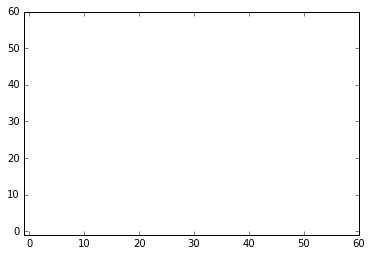

In [12]:
%matplotlib inline
val = .35
size = 60

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

middle = ((0, 0), )

def update(data):
    ff.update()
    return ff.plot(),

burn = []
trees = []
while val <= .65:
    tempBurn = []
    tempTree = []
    for i in range(0, 20):
        ff = Forest(size, False)
        ff.random_setup(val)
        ff.set_fire(middle)
        tempTree.append(ff.initTree)
        while np.count_nonzero(ff.cells == 2) != 0:
            ff.update()
        tempBurn.append(ff.burnt)
    burn.append(tempBurn)
    trees.append(tempTree)
        
    val += .05

Von Neuman - No Torus
Density = 35%, Percent of Inital Trees Burned = 0.5094059604508443%
Density = 40%, Percent of Inital Trees Burned = 0.9352292876264646%
Density = 45%, Percent of Inital Trees Burned = 1.7388623400647447%
Density = 50%, Percent of Inital Trees Burned = 2.7491504651551444%
Density = 55%, Percent of Inital Trees Burned = 15.265576088054125%
Density = 60%, Percent of Inital Trees Burned = 40.38474878031862%
Density = 65%, Percent of Inital Trees Burned = 75.21932640047932%


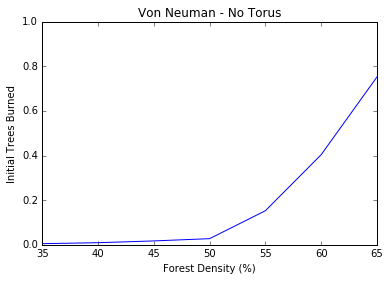

In [13]:
perc = 35
points = []
percs = []
print("Von Neuman - No Torus")
for i in range(len(burn)):
    points.append((sum(burn[i])/ (sum(trees[i]))))
    percs.append(perc)
    print("Density = " + str(perc) + "%, Percent of Inital Trees Burned = " + str(100 * (sum(burn[i])/ (sum(trees[i])))) + "%")
    perc += 5
percs = np.array(percs)
points = np.array(points)
plt.plot(percs, points)
plt.xlim(35, 65)
plt.ylim(0, 1)
plt.title("Von Neuman - No Torus")
plt.xlabel("Forest Density (%)")
plt.ylabel("Initial Trees Burned")

The Density of the forest needs to be upward of 60% in order for th fire to actually spread. As you can see from the numbers above, at 60% around 40% the trees will become burnt. The burned percentage for 55% density is around 15% of the original trees. This is a substantial increase and shows that the density needs to be upward of 55% or 60% to spread. It has to be above 60% to get more than half the trees burned.

This is with out the torus on. So I expect the spread to be much greater.



Von Neuman - Torus
Density = 35%, Percent of Inital Trees Burned = 0.747193031525952%
Density = 40%, Percent of Inital Trees Burned = 0.9588229141243332%
Density = 45%, Percent of Inital Trees Burned = 0.8934091752194881%
Density = 50%, Percent of Inital Trees Burned = 5.253583241455347%
Density = 55%, Percent of Inital Trees Burned = 8.10886931585416%
Density = 60%, Percent of Inital Trees Burned = 79.83883964544722%
Density = 65%, Percent of Inital Trees Burned = 89.26450727775514%


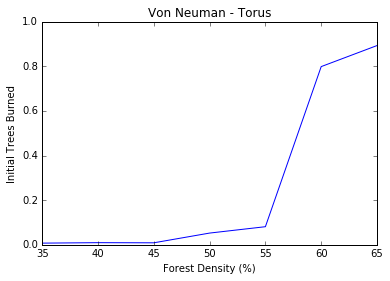

In [10]:
val = .35
size = 60

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

middle = ((0, 0), )

def update(data):
    ff.update()
    return ff.plot(),

tBurn = []
tTrees = []
while val <= .65:
    tempBurn = []
    tempTree = []
    for i in range(0, 20):
        ff = Forest(size, True)
        ff.random_setup(val)
        ff.set_fire(middle)
        tempTree.append(ff.initTree)
        while np.count_nonzero(ff.cells == 2) != 0:
            ff.update()
        tempBurn.append(ff.burnt)
    tBurn.append(tempBurn)
    tTrees.append(tempTree)
        
    val += .05
    
perc = 35
points = []
percs = []
print("Von Neuman - Torus")
for i in range(len(tBurn)):
    points.append((sum(tBurn[i])/ (sum(tTrees[i]))))
    percs.append(perc)
    print("Density = " + str(perc) + "%, Percent of Inital Trees Burned = " + str(100 * (sum(tBurn[i])/ (sum(tTrees[i])))) + "%")
    perc += 5
    
percs = np.array(percs)
points = np.array(points)
plt.plot(percs, points)
plt.xlim(35, 65)
plt.ylim(0, 1)
plt.title("Von Neuman - Torus")
plt.xlabel("Forest Density (%)")
plt.ylabel("Initial Trees Burned")

Again the spread of the fire with the map as a torus has to have a density of more than 55% for the spread to become devastating. However at a density of 60% the difference is massive. Using a Torus the amount of trees burned at 60% went up to almost 80% burned. Which is close to a 40% increase over not using the torus. 

The torus clearly increases the amount of burned trees. 

Using the Torus the spread of the fire doesn't happen until above 55% density.

# Moore Neighborhood

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as cc
from matplotlib.colors import ListedColormap

class ForestM():
    
    states = {"EMPTY":0, "TREE":1, "FIRE":2, "BURNT":3}
    
    def __init__(self, size, torus):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size), dtype="int")
        self.burnt = 0
        self.initTree = 0
        self.initEmpty = 0
        self.torus = torus
        
    def set_fire(self, locs):
        for p in locs:
            self.cells[p[0] + self.size // 2, p[1] + self.size // 2] = Forest.states["FIRE"]
        
    def random_setup(self, d):
        for i in range(self.size):
            for j in range(self.size):
                if (np.random.random() < d):
                    self.cells[i, j] = Forest.states["TREE"]
                else:
                    self.cells[i, j] = Forest.states["EMPTY"]
        self.initTree = np.count_nonzero(self.cells == 1)
        self.initEmpty = np.count_nonzero(self.cells == 0)
        
    def image_setup(self):
        plt.title("Forest Fire Simulation")
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=Forest.states["EMPTY"],
                            vmax=Forest.states["BURNT"], 
                            cmap=ff1)

    def update(self):
        newcells = np.zeros((self.size, self.size), dtype="int")
        for i in range(self.size):
            for j in range(self.size):
                #neighbors = von_neuman_neighbors(i, j, self.size, True)
                neighbors = moore_neighbors(i, j, self.size, self.torus)
                # TODO Add in code to make the fire spread. If a tree is near 
                #  a fire cell, it catches. All trees on fire burn out completely in
                #  one timestep.
                if self.cells[i,j] == Forest.states["FIRE"]:
                    newcells[i,j] = Forest.states["BURNT"]
                elif self.cells[i,j] == Forest.states["TREE"]:
                    newcells[i,j] = self.cells[i,j]
                    for n in neighbors:
                        if self.cells[n[0], n[1]] == Forest.states["FIRE"]:
                            newcells[i, j] = Forest.states["FIRE"]
                elif self.cells[i,j] == Forest.states["BURNT"]:
                    newcells[i,j] = self.cells[i,j]
                elif self.cells[i,j] == Forest.states["EMPTY"]:
                    newcells[i,j] = self.cells[i,j]
                    
                # TODO Revise to have burnt trees turn into empty cells randomly
                
                # TODO Revise to have empty cells grow new trees randomly if they
                #  they are adjacent to a living tree
                    
                    
        # TODO Add in a probability of a lightning strike each round. If it hits a 
        #  tree, the tree is set on fire.
        self.burnt = np.count_nonzero(newcells == 3)    
        self.cells = newcells
        
    def plot(self):
        self.plt.set_data(self.cells)
        return self.plt
    
val = .35
size = 60

middle = ((0, 0), )

def update(data):
    ff.update()
    return ff.plot(),

mBurn = []
mTrees = []
while val <= .65:
    tempBurn = []
    tempTree = []
    for i in range(0, 20):
        ff = ForestM(size, False)
        ff.random_setup(val)
        ff.set_fire(middle)
        tempTree.append(ff.initTree)
        while np.count_nonzero(ff.cells == 2) != 0:
            ff.update()
        tempBurn.append(ff.burnt)
    mBurn.append(tempBurn)
    mTrees.append(tempTree)
        
    val += .05

Moore - No Torus
Density = 35%, Percent of Inital Trees Burned = 10.511554414378827%
Density = 40%, Percent of Inital Trees Burned = 29.406649972175845%
Density = 45%, Percent of Inital Trees Burned = 72.17562900838678%
Density = 50%, Percent of Inital Trees Burned = 96.28787038064588%
Density = 55%, Percent of Inital Trees Burned = 98.9614841701956%
Density = 60%, Percent of Inital Trees Burned = 99.69127980647391%
Density = 65%, Percent of Inital Trees Burned = 99.8492984951075%


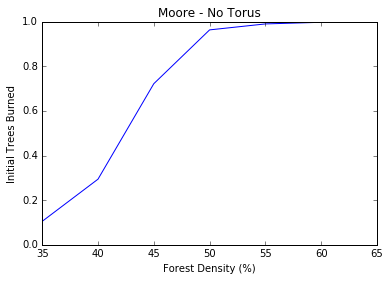

In [16]:
print("Moore - No Torus")
perc = 35
points = []
percs = []
for i in range(len(mBurn)):
    points.append((sum(mBurn[i])/ (sum(mTrees[i]))))
    percs.append(perc)
    print("Density = " + str(perc) + "%, Percent of Inital Trees Burned = " + str(100 * (sum(mBurn[i])/ (sum(mTrees[i])))) + "%")
    perc += 5
    
percs = np.array(percs)
points = np.array(points)
plt.plot(percs, points)
plt.xlim(35, 65)
plt.ylim(0, 1)
plt.title("Moore - No Torus")
plt.xlabel("Forest Density (%)")
plt.ylabel("Initial Trees Burned")

The Moore neighborhood makes the spread of fire much more rapid. The fire begins to spread at 45%. At 40% the percent of burned trees goes up near a third of the original trees. 45% moves all the way near 70 and then it is past 90% for the rest of the densities. 

Even without the Torus there is mass devistation throughout the forest. 

Moore - Torus
Density = 35%, Percent of Inital Trees Burned = 13.281096192463677%
Density = 40%, Percent of Inital Trees Burned = 47.44423953512648%
Density = 45%, Percent of Inital Trees Burned = 93.9054225635626%
Density = 50%, Percent of Inital Trees Burned = 98.32907738425669%
Density = 55%, Percent of Inital Trees Burned = 99.45493725440487%
Density = 60%, Percent of Inital Trees Burned = 99.900688253499%
Density = 65%, Percent of Inital Trees Burned = 99.9893478770319%


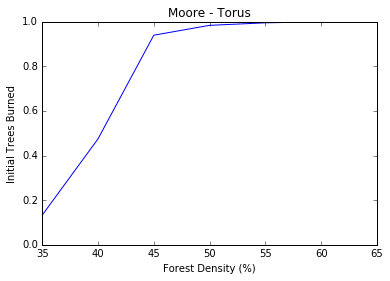

In [18]:
def update(data):
    ffT.update()
    return ffT.plot(),

mTBurn = []
mTTrees = []
val = .35

while val <= .65:
    tempBurn = []
    tempTree = []
    for i in range(0, 20):
        ffT = ForestM(size, True)
        ffT.random_setup(val)
        ffT.set_fire(middle)
        tempTree.append(ffT.initTree)
        while np.count_nonzero(ffT.cells == 2) != 0:
            ffT.update()
        tempBurn.append(ffT.burnt)
    mTBurn.append(tempBurn)
    mTTrees.append(tempTree)
        
    val += .05
    
print("Moore - Torus")
perc = 35
points = []
percs = []
for i in range(len(mTBurn)):
    points.append((sum(mTBurn[i])/ (sum(mTTrees[i]))))
    percs.append(perc)
    print("Density = " + str(perc) + "%, Percent of Inital Trees Burned = " + str(100 * (sum(mTBurn[i])/ (sum(mTTrees[i])))) + "%")
    perc += 5
    
percs = np.array(percs)
points = np.array(points)
plt.plot(percs, points)
plt.xlim(35, 65)
plt.ylim(0, 1)
plt.title("Moore - Torus")
plt.xlabel("Forest Density (%)")
plt.ylabel("Initial Trees Burned")

As you can see from the data above, the percent of density where the fire spreads is all the way down to 40%. This is with the torus and Moore neighborhood. So clearly using torus and Moore neighborhood causes a greater spread of fire through out the forest, no matter the density.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as cc
from matplotlib.colors import ListedColormap

class ForestTime():
    
    states = {"EMPTY":0, "TREE":1, "FIRE":2, "BURNT":3}
    
    def __init__(self, size, torus):
        self.size = size
        self.x = np.arange(size)
        self.y = np.arange(size)
        self.cells = np.zeros((size, size), dtype="int")
        self.time = 0
        self.burnt = 0
        self.initTree = 0
        self.initEmpty = 0
        self.torus = torus
        
        self.burntList = []
        self.treeList = []
        self.emptyList = []
        self.fireList = []
        
    def set_fire(self, locs):
        for p in locs:
            self.cells[p[0] + self.size // 2, p[1] + self.size // 2] = Forest.states["FIRE"]
        
    def random_setup(self, d):
        for i in range(self.size):
            for j in range(self.size):
                if (np.random.random() < d):
                    self.cells[i, j] = Forest.states["TREE"]
                else:
                    self.cells[i, j] = Forest.states["EMPTY"]
        self.initTree = np.count_nonzero(self.cells == 1)
        self.initEmpty = np.count_nonzero(self.cells == 0)
        
    def image_setup(self):
        plt.title("Forest Fire Simulation")
        self.plt = plt.imshow(self.cells, interpolation='nearest', 
                            origin='bottom', 
                            vmin=Forest.states["EMPTY"],
                            vmax=Forest.states["BURNT"], 
                            cmap=ff1)

    def update(self):
        self.time += 1
        
        newcells = np.zeros((self.size, self.size), dtype="int")
        
        
        for i in range(self.size):
            for j in range(self.size):
                neighbors = von_neuman_neighbors(i, j, self.size, self.torus)
                #neighbors = moore_neighbors(i, j, self.size, True)
                # TODO Add in code to make the fire spread. If a tree is near 
                #  a fire cell, it catches. All trees on fire burn out completely in
                #  one timestep.
                if self.cells[i,j] == Forest.states["FIRE"]:
                    newcells[i,j] = Forest.states["BURNT"]
                elif self.cells[i,j] == Forest.states["TREE"]:
                    newcells[i,j] = self.cells[i,j]
                    for n in neighbors:
                        if self.cells[n[0], n[1]] == Forest.states["FIRE"]:
                            newcells[i, j] = Forest.states["FIRE"]
                elif self.cells[i,j] == Forest.states["BURNT"]:
                    rand = np.random.random()
                    if rand >= .99:
                        newcells[i, j] = Forest.states["EMPTY"]
                    else:
                        newcells[i,j] = self.cells[i,j]
                elif self.cells[i,j] == Forest.states["EMPTY"]:
                    rand = np.random.random()
                    if rand >= .999:
                        #newcells[i, j] = Forest.states["TREE"]
                        for n in neighbors:
                            if self.cells[n[0], n[1]] == Forest.states["TREE"]:
                                newcells[i, j] = Forest.states["TREE"]
                    else:
                        newcells[i,j] = self.cells[i,j]
                    
                # TODO Revise to have burnt trees turn into empty cells randomly
                ##Random numbers for each of these. 
                ##For empty cells adjacent. look to the Tree to Fire section
                # TODO Revise to have empty cells grow new trees randomly if they
                #  they are adjacent to a living tree
                    
                    
        # TODO Add in a probability of a lightning strike each round. If it hits a 
        #  tree, the tree is set on fire.
        probLightning = .005
        randL = np.random.random()
        #2 Random numbers between 0 and size - 1, this will be i, j
        l = np.random.randint(0, size - 1)
        m = np.random.randint(0, size - 1)
        if randL < probLightning:
            if newcells[l, m] == Forest.states["TREE"]:
                newcells[l, m] = Forest.states["FIRE"]
        #Check if the cell at i, j is a tree. If it is, set it to Fire
        self.burnt = np.count_nonzero(newcells == 3)   
        self.burntList.append(int(np.count_nonzero(newcells == 3)))
        self.treeList.append(int(np.count_nonzero(newcells == 1)))
        self.emptyList.append(int(np.count_nonzero(newcells == 0)))
        self.fireList.append(int(np.count_nonzero(newcells == 2)))
        self.cells = newcells
        
    def plot(self):
        self.plt.set_data(self.cells)
        return self.plt
        
size = 60
density = 0.55

fig, ax = plt.subplots()
ax.set_ylim(-1, size)
ax.set_xlim(-1, size)

middle = ((0, 0), )

ff = ForestTime(size, False)
ff.random_setup(density)
ff.set_fire(middle)

################
# ANIMATION
ff.image_setup()

def update(data):
    ff.update()
    return ff.plot(),

def data_gen():
    while True: yield 1

ani = animation.FuncAnimation(fig, update, data_gen, blit=False, interval=200)
plt.show()

NameError: name 'Forest' is not defined

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


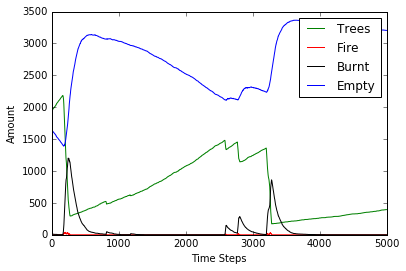

In [100]:
%matplotlib inline
fftimed = ForestTime(size, False)
fftimed.random_setup(density)
fftimed.set_fire(middle)

while fftimed.time < 5000:
    fftimed.update()

plt.gca().set_color_cycle(['green', 'red', 'black', 'blue'])    
plt.plot(fftimed.treeList, label="Trees")
plt.plot(fftimed.fireList, label="Fire")
plt.plot(fftimed.burntList, label="Burnt")
plt.plot(fftimed.emptyList, label="Empty")
plt.xlabel("Time Steps")
plt.ylabel("Amount")
plt.legend()

You can see that over 5000 updates the number of trees slowly falls. There are instances of growth that happen with the trees, however when the aomunt of trees becomes to much a lighting strike seems to hit that will cause fires to spread within the forest. Small pockets are left becuase of the Von Neuman neighborhood being used as well as not using the torus for the map. So these small pockets grow and then reach some critical point where a lighning strike will happen. 

This is with a slow growth rate, slightly faster decay of burnt trees and then a fairly low chance of lighning creating fire. 